In [2]:
import numpy as np
import pandas as pd

In [9]:
fname = "ASD/V06_SA.csv"
raw_data = pd.read_csv(fname, index_col=0)
print("Shape:", raw_data.shape)
raw_data.head()

Shape: (336, 343)


,Age_at_visit_start,Project,Status,ASD_DX,ASD_DX_group,group ID,Identifiers,Cohort,Risk,VisitSA,...,ROI324,ROI325,ROI326,ROI327,ROI328,ROI329,ROI330,ROI331,ROI332,ROI333
CandID,,,,,,,,,,,,,,,,,,,,,
103430,25.0,IBIS1,Complete,NO (DSM_IV questions 4a/4b is no and not atypi...,TYPICAL,1,STL0188,6 month recruit,HR,V06,...,46.523426,88.635681,15.326110,268.573364,143.174347,1.515198,239.148468,20.107052,34.309757,10.180353
107524,25.0,IBIS1,Complete,YES (DSM_IV questions 4a/4b is Yes),ASD,2,STL0200,6 month recruit,HR,V06,...,30.664413,76.203514,25.545485,188.544678,107.464104,1.381342,188.476715,17.961386,23.440365,14.530558
108372,24.0,IBIS2,Active,NO (DSM_IV questions 4a/4b is no and not atypi...,TYPICAL,1,UNC1023,IBIS2 Low Risk,LR,V06,...,35.009350,99.737000,23.199062,282.846497,29.161158,0.722310,200.596985,28.989164,32.400013,10.532928
113320,24.0,IBIS1,Active,NO (DSM_IV questions 4a/4b is no and not atypi...,TYPICAL,1,PHI0207,Control,LR,V06,...,40.359753,111.341911,15.794782,214.678467,75.857338,1.767594,179.606552,16.667351,44.315159,12.016207
114640,26.0,IBIS1,Active,NO (DSM_IV questions 4a/4b is no and not atypi...,TYPICAL,1,SEA0102,Control,LR,V06,...,49.686398,134.082794,18.534616,217.291305,36.213020,1.580427,181.796356,22.934441,63.739361,10.897783


In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 103430 to 996312
Columns: 343 entries, Age_at_visit_start to ROI333
dtypes: float64(334), int64(1), object(8)
memory usage: 903.0+ KB


In [11]:
_types = raw_data.dtypes.groupby(raw_data.dtypes).groups
data_types = {k.name: v for k, v in _types.items()}
data_types

{'int64': Index(['group ID'], dtype='object'),
 'float64': Index(['Age_at_visit_start', 'ROI01', 'ROI02', 'ROI03', 'ROI04', 'ROI05',
        'ROI06', 'ROI07', 'ROI08', 'ROI09',
        ...
        'ROI324', 'ROI325', 'ROI326', 'ROI327', 'ROI328', 'ROI329', 'ROI330',
        'ROI331', 'ROI332', 'ROI333'],
       dtype='object', length=334),
 'object': Index(['Project', 'Status', 'ASD_DX', 'ASD_DX_group', 'Identifiers', 'Cohort',
        'Risk', 'VisitSA'],
       dtype='object')}

## Drop NaN values
> Just use the built in pandas function to quickly drop NaNs

In [12]:
raw_data = raw_data.dropna()
print("Shape:", raw_data.shape)

Shape: (325, 343)


In [14]:
# non_feature_cols = ["CandID", "Age_at_visit_start", "Status", "ASD_DX_group", "group ID", "Identifiers", "Cohort", "Risk"]
# non_feature_cols = list(raw_data.columns[:11])

non_feature_cols = list(data_types["object"])
non_feature_cols.extend(["group ID","Age_at_visit_start"])

features = raw_data.drop(columns=non_feature_cols)
features.head()

,ROI01,ROI02,ROI03,ROI04,ROI05,ROI06,ROI07,ROI08,ROI09,ROI10,...,ROI324,ROI325,ROI326,ROI327,ROI328,ROI329,ROI330,ROI331,ROI332,ROI333
CandID,,,,,,,,,,,,,,,,,,,,,
103430,529.158386,298.568665,190.627472,134.555801,363.573608,646.810547,33.957870,172.629700,58.659229,88.770279,...,46.523426,88.635681,15.326110,268.573364,143.174347,1.515198,239.148468,20.107052,34.309757,10.180353
107524,518.345703,311.013794,118.777634,198.685638,477.074524,405.450134,55.401951,126.927612,57.548630,43.613918,...,30.664413,76.203514,25.545485,188.544678,107.464104,1.381342,188.476715,17.961386,23.440365,14.530558
108372,443.658081,156.824844,157.223099,147.381149,492.784088,305.069519,61.638298,136.602600,11.748866,51.033894,...,35.009350,99.737000,23.199062,282.846497,29.161158,0.722310,200.596985,28.989164,32.400013,10.532928
113320,529.817078,301.160583,129.092483,151.090851,395.564331,597.880981,32.048248,163.701218,47.578297,46.981075,...,40.359753,111.341911,15.794782,214.678467,75.857338,1.767594,179.606552,16.667351,44.315159,12.016207
114640,689.399170,303.337524,154.169434,98.182709,592.248962,364.648315,10.539658,142.580795,149.398560,54.505650,...,49.686398,134.082794,18.534616,217.291305,36.213020,1.580427,181.796356,22.934441,63.739361,10.897783


In [15]:
non_feature_cols 

['Project',
 'Status',
 'ASD_DX',
 'ASD_DX_group',
 'Identifiers',
 'Cohort',
 'Risk',
 'VisitSA',
 'group ID',
 'Age_at_visit_start']

In [48]:
# features.dtypes

(380, 99)


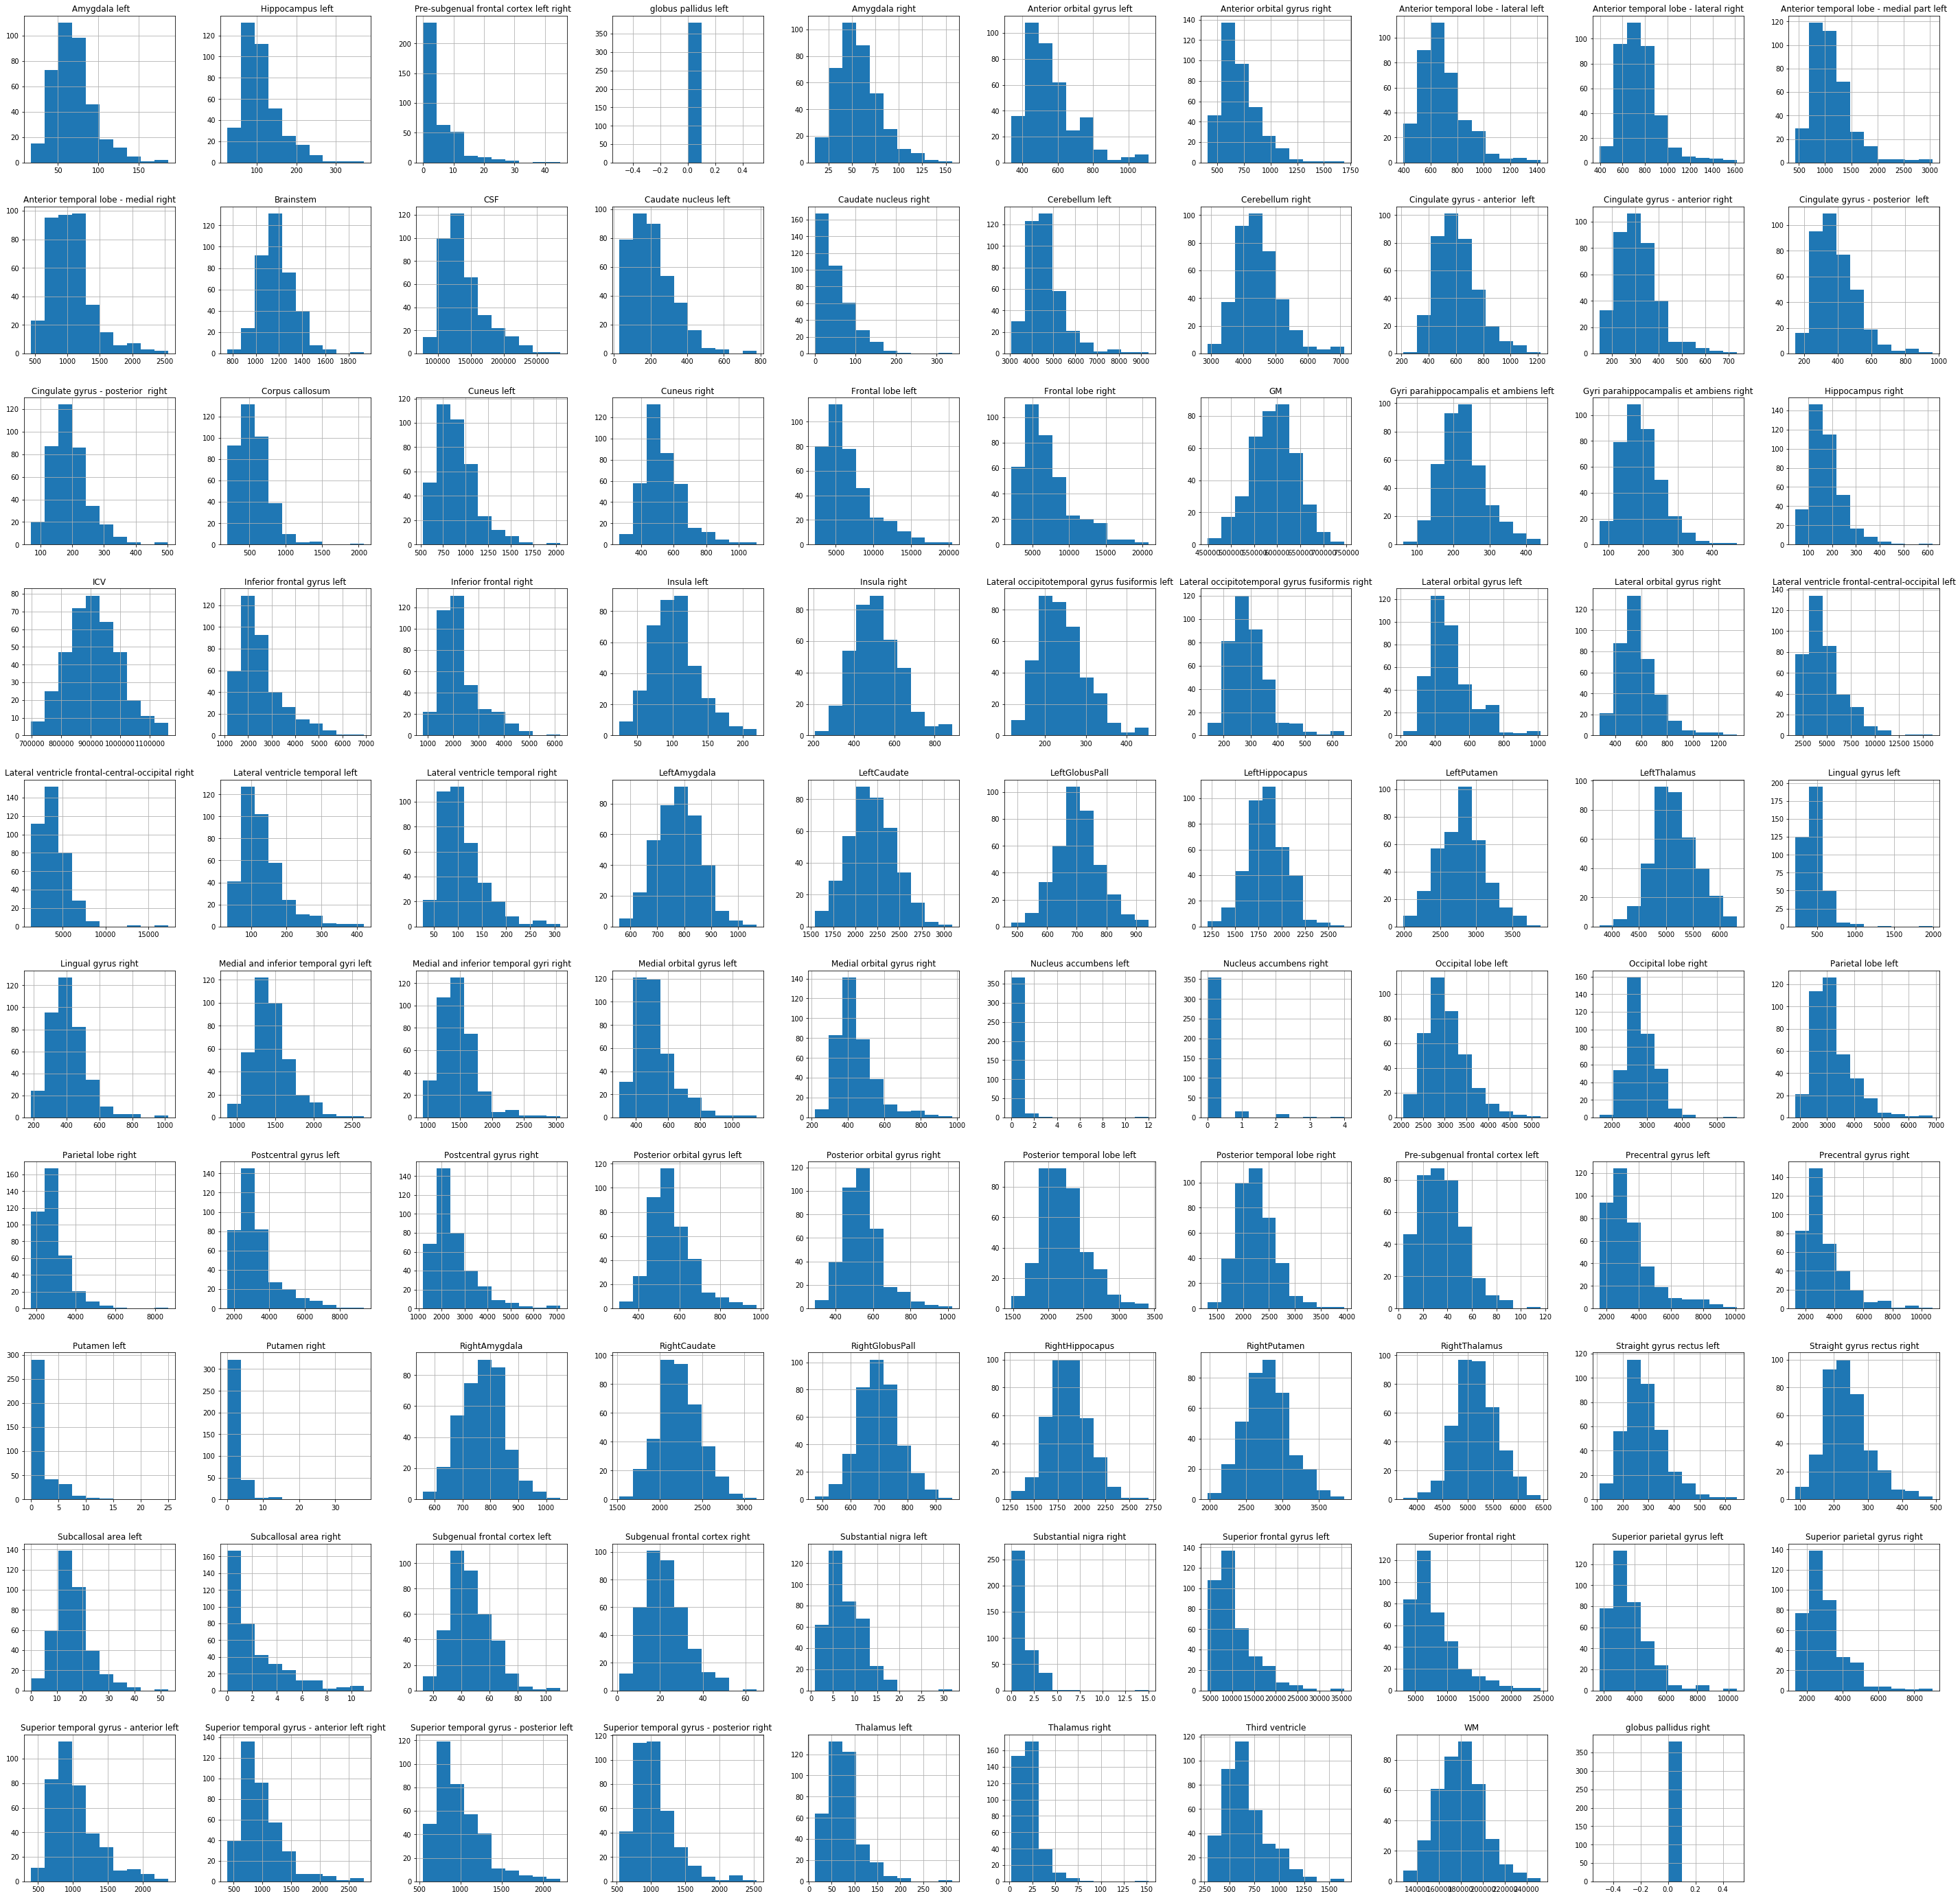

In [53]:
features.hist(figsize=(50,50))
print(features.shape)

In [16]:
labels = raw_data[["ASD_DX_group", "Risk"]]
labels.head()

,ASD_DX_group,Risk
CandID,,
103430,TYPICAL,HR
107524,ASD,HR
108372,TYPICAL,LR
113320,TYPICAL,LR
114640,TYPICAL,LR


## Getting NaN values

In [50]:
# nan_mask = pd.isnull(labels)
# nan_mask = np.logical_or(nan_samples["ASD_DX_group"], nan_samples["Risk"])

# nan_sample_idxs = labels[nan_samples].index
# labels[nan_samples]

In [17]:
cleaned_data = pd.concat([labels, features], axis=1)
print(cleaned_data.shape)
cleaned_data.head()

(325, 335)


,ASD_DX_group,Risk,ROI01,ROI02,ROI03,ROI04,ROI05,ROI06,ROI07,ROI08,...,ROI324,ROI325,ROI326,ROI327,ROI328,ROI329,ROI330,ROI331,ROI332,ROI333
CandID,,,,,,,,,,,,,,,,,,,,,
103430,TYPICAL,HR,529.158386,298.568665,190.627472,134.555801,363.573608,646.810547,33.957870,172.629700,...,46.523426,88.635681,15.326110,268.573364,143.174347,1.515198,239.148468,20.107052,34.309757,10.180353
107524,ASD,HR,518.345703,311.013794,118.777634,198.685638,477.074524,405.450134,55.401951,126.927612,...,30.664413,76.203514,25.545485,188.544678,107.464104,1.381342,188.476715,17.961386,23.440365,14.530558
108372,TYPICAL,LR,443.658081,156.824844,157.223099,147.381149,492.784088,305.069519,61.638298,136.602600,...,35.009350,99.737000,23.199062,282.846497,29.161158,0.722310,200.596985,28.989164,32.400013,10.532928
113320,TYPICAL,LR,529.817078,301.160583,129.092483,151.090851,395.564331,597.880981,32.048248,163.701218,...,40.359753,111.341911,15.794782,214.678467,75.857338,1.767594,179.606552,16.667351,44.315159,12.016207
114640,TYPICAL,LR,689.399170,303.337524,154.169434,98.182709,592.248962,364.648315,10.539658,142.580795,...,49.686398,134.082794,18.534616,217.291305,36.213020,1.580427,181.796356,22.934441,63.739361,10.897783


In [21]:
cleaned_data.to_csv("data/cleaned_SA.csv", index_label="CandID")